<a href="https://colab.research.google.com/github/atomiceltaweel/CV/blob/main/Copy_of_a5c31dab8ff59f867a55f34e2d37ea7a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Age Prediction Baseline</center></h1>

<img src="https://images.aicrowd.com/raw_images/challenges/banner_file/1037/4d7d9875c6b179b6511a.png">

## ❓Problem Statement

In this puzzle, we need to build a supervised image classification model to predicts the age of a human face from an input image. Each image needs to be classified as one of the ten buckets, each with an age range of 10 years  `(0-10, 10-20, 20-30,......90-100).`


## 💪 Getting started

`Supervised Learning`  | `Computer Vision` |  `Classification` 

In this starter notebook, 
- We will be building a `face age prediction model` using a basic `convolutional neural network` called `Alexnet`.  
- Setting up the workspace to download the data from aicrowd, working out the dataset for model training 
- Submitting our predictions direcly via this notebook.


<p align="center" >
<img width=300px src="https://images.aicrowd.com/uploads/ckeditor/pictures/712/content_75987bbe-59e5-4649-9c82-f3e10be7e69a.png">
</p>


### Tech Stack

<p align="center">
<img align="left" src="https://img.shields.io/badge/Python-3776AB.svg?&logo=python&logoColor=white" style="margin:0;">
<img align="left" src="https://img.shields.io/badge/Numpy-013243.svg?&logo=numpy&logoColor=white" style="margin:0;margin-left:5px">
<img align="left" src="https://img.shields.io/badge/Pandas-%23150458.svg?style=&logo=pandas&logoColor=white" style="margin:0;margin-left:5px">
<img align="left" src="https://img.shields.io/badge/Opencv-%23white.svg?logo=opencv&logoColor=white" style="margin:0;margin-left:5px">
<img align="left" src="https://img.shields.io/badge/TensorFlow-%23FF6F00.svg?logo=TensorFlow&logoColor=white" style="margin:0;margin-left:5px">
<img align="left" src="https://img.shields.io/badge/Keras-%23D00000.svg?logo=Keras&logoColor=white" style="margin:0;margin-left:5px">
</p>

###  

## 📋 Content


1. 💼 [Setting our Workspace](#💼-Setting-our-Workspace)

2. 📦 [Importing Libraries](#📦-Importing-Libraries)

3. 🗃️ [Data Setup](#🗃%EF%B8%8F-Data-Setup)<br>
    ○ Loading and Reading Data<br>
    ○ Review data<br>
    
4. 🖼️ [Visualizing data](#🖼%EF%B8%8F-Visualizing-data)<br>
    ○ Viewing Random samples<br>
    ○ Viewing Label-wise random sample<br>

5. 🧹 [Data Cleaning](#🧹-Data-Cleaning)

6. 📊 [Data Exploration](#📊-Data-Exploration)

7. 🧰 [Data Augmentation](#🧰-Data-Augmentation)<br>
    ○ Understanding Data Augmentation<br>
    ○ Sample Visualization of Data Augmentation<br>

8. ⚙️[Data Pre-processing](#⚙%EF%B8%8F-Data-Pre-processing)<br>
    ○ Train - Validation Data Generators<br>
    ○ Review data<br>

9. 🛠️ [Model Building](#🛠%EF%B8%8F-Model-Building)<br>
    ○ Understanding basics of Convolutional Neural Networks<br>
    ○ Building CNN using Alex Net Architecture<br>

10. 🚀 [Model Training](#🚀-Model-Training)

11. 🔍 [Evaluation](#🔍-Evaluation)<br>
    ○ Plotting training metrics<br>
    ○ Evaluation using classification metrics<br>
    ○ Visualizing predictions<br>

12. ✅ [Submission](#✅-Submission)<br>
    ○ ✨ Model Inference

13. 💡 [More Ideas](#💡-More-Ideas)<br>

###   

## 💼 Setting our Workspace

Lets get started by setting up the workspace. AIcrowd provides a simple CLI tool to interact with the AIcrowd platform and helps in downloading the datasets and making a submission directly via the notebook. Lets download that first and also login to the platform.

In [ ]:
# Downloading the aicrowd python library
!pip install aicrowd-cli

# Make sure to re-run below code whenever you restart colab notebook
%load_ext aicrowd.magic

     |████████████████████████████████| 51 kB 3.4 MB/s 
     |████████████████████████████████| 170 kB 19.7 MB/s 
     |████████████████████████████████| 54 kB 1.9 MB/s 
     |████████████████████████████████| 63 kB 809 kB/s 
     |████████████████████████████████| 214 kB 35.5 MB/s 
     |████████████████████████████████| 1.1 MB 41.7 MB/s 
     |████████████████████████████████| 63 kB 649 kB/s 
     |████████████████████████████████| 51 kB 847 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 22.3.0
    Uninstalling pyzmq-22.3.0:
      Successfully uninstalled pyzmq-22.3.0
  Attempting uninstall: python-slugify
    Found existing installation: python-slugify 6.1.1
    Uninstalling python-slugify-6.1.1:
      Successfully uninstalled python-slugify-6.1.1
ERROR: pip's dependency resolver does not curren

In [ ]:
# Logging in from our AIcrowd account. Make sure you have accepted the puzzle rules before logging in!  

%aicrowd login

Please login here: https://api.aicrowd.com/auth/8NF8THxU7bSqGgR-kfnpp6ClNZtfIRO_vMOnpRA2-I4
API Key valid
Gitlab access token valid
Saved details successfully!


In [ ]:
# Creating a new data directory and downloading the dataset 

!rmdir -rf data
!mkdir data
%aicrowd ds dl -c human-age-prediction -o data

rmdir: invalid option -- 'r'
Try 'rmdir --help' for more information.


sample_submission.csv:   0%|          | 0.00/36.0k [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/36.0k [00:00<?, ?B/s]

test.zip:   0%|          | 0.00/176M [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/48.3k [00:00<?, ?B/s]

train.zip:   0%|          | 0.00/236M [00:00<?, ?B/s]

val.csv:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

val.zip:   0%|          | 0.00/117M [00:00<?, ?B/s]

In [ ]:
# Unzipping the datasets and moving them into the created folders

!unzip data/train.zip -d data/train
!unzip data/val.zip -d data/val
!unzip data/test.zip -d data/test

Streaming output truncated to the last 5000 lines.
  inflating: data/val/w9dsx.jpg      
  inflating: data/val/yauk1.jpg      
  inflating: data/val/i4i58.jpg      
  inflating: data/val/l1668.jpg      
  inflating: data/val/vs69k.jpg      
  inflating: data/val/46oc1.jpg      
  inflating: data/val/96s7r.jpg      
  inflating: data/val/m9a92.jpg      
  inflating: data/val/gutd0.jpg      
  inflating: data/val/xfoez.jpg      
  inflating: data/val/yv2s4.jpg      
  inflating: data/val/f30eu.jpg      
  inflating: data/val/wlv3l.jpg      
  inflating: data/val/fdrzb.jpg      
  inflating: data/val/d7o61.jpg      
  inflating: data/val/cldpj.jpg      
  inflating: data/val/mcpok.jpg      
  inflating: data/val/47znj.jpg      
  inflating: data/val/84w7x.jpg      
  inflating: data/val/xj9zh.jpg      
  inflating: data/val/5om7q.jpg      
  inflating: data/val/052e1.jpg      
  inflating: data/val/jgl8h.jpg      
  inflating: data/val/90hou.jpg      
  inflating: data/val/19azy.jpg      

###  

## 📦 Importing Libraries

In [ ]:
import os
import random
from tqdm.notebook import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
from tensorflow import keras

###  

## 🗃️ Data Setup

Here, we will be reading the datasets, reviewing them, and checking some basic information about the dataset in order to proceed further.

### Loading and Reading Data

In [ ]:
# Reading data folders
TRAIN_IMAGES_PATH = 'data/train/'
VAL_IMAGES_PATH = 'data/val/'

# Reading data files
df_train = pd.read_csv("data/train.csv")
df_val = pd.read_csv("data/val.csv")

### Review data

In [ ]:
# Display first n rows

df_train.head()

,ImageID,age
0,93vu1,30-40
1,yjifi,80-90
2,ldd2k,90-100
3,eiwe0,40-50
4,sc0bp,0-10


In [ ]:
# Checking training and validation images count
print("Training Images    : ", len(os.listdir(TRAIN_IMAGES_PATH)))
print("Validation Images : ", len(os.listdir(VAL_IMAGES_PATH)))

# Checking training and validation dataset dimensions
print("Training   :", df_train.shape)
print("Validation :", df_val.shape)

Training Images    :  4000
Validation Images :  1999
Training   : (4000, 2)
Validation : (2000, 2)


###   

## 🖼️ Visualizing data

After downloading the data, we can take a look at what's inside by visualizing some random samples from the dataset along with their labels, to get an overview of how the dataset looks like which helps to build up ideas and choose approaches to tackle the particular problem.

### Viewing Random samples

Random Samples from dataset


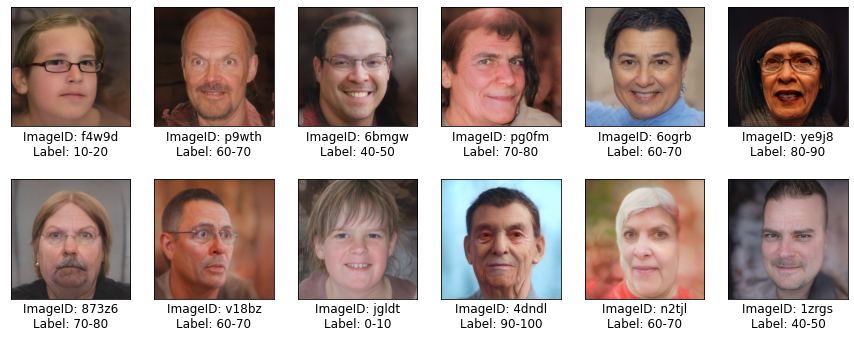

In [ ]:
# Viewing random samples from the training data

# number of samples
SAMPLES = 12

COLS = 6
ROWS = (SAMPLES//COLS)+1

fig = plt.figure(figsize=(15, 3*ROWS))
for idx in range(SAMPLES):
    ax = fig.add_subplot(ROWS, COLS, idx+1)
    ax.set_xticks([])
    ax.set_yticks([])
    
    # reading a random filename and its label
    random_idx = random.randint(0, len(df_train)-1)
    image_name = df_train.iloc[random_idx, 0]
    label = df_train.iloc[random_idx, 1]
    
    # reading the file from the images folder
    file_name = TRAIN_IMAGES_PATH + image_name + ".jpg"
    sample_img = cv2.imread(file_name)
    sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

    ax.imshow(sample_img)
    ax.text(0.5, -0.15, f'ImageID: {str(image_name):s}\nLabel: {str(label):s}',
            size=12, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

print("Random Samples from dataset")
plt.show()

### Viewing Label-wise random samples

Random Samples from each class in dataset


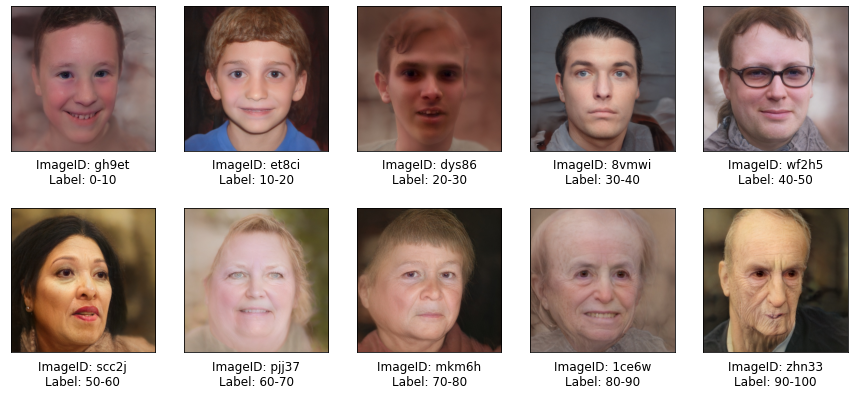

In [ ]:
# Viewing random samples from each label class from the training data

# reading random images from each class
labels = list(sorted(set(df_train['age'])))

samples_per_label = []
for label in labels:
    label_sample_images = list(df_train[df_train['age']==label]['ImageID'])
    sample = random.choice(label_sample_images)
    samples_per_label.append((label, sample))


# number of samples
SAMPLES = len(labels)

COLS = 5
ROWS = (SAMPLES//COLS)+1

fig = plt.figure(figsize=(15, 3.5*ROWS))
for idx in range(SAMPLES):
    ax = fig.add_subplot(ROWS, COLS, idx+1)
    ax.set_xticks([])
    ax.set_yticks([])

    label = samples_per_label[idx][0]
    image_name = samples_per_label[idx][1]
    
    # reading the file from the images folder
    file_name = TRAIN_IMAGES_PATH + image_name + ".jpg"
    sample_img = cv2.imread(file_name)
    sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

    ax.imshow(sample_img)
    ax.text(0.5, -0.15, f'ImageID: {str(image_name):s}\nLabel: {str(label):s}',
            size=12, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

print("Random Samples from each class in dataset")
plt.show()

###   

## 🧹 Data Cleaning

Looking at the data, it's a good practice to check if all the images in the data are readable i.e. some images could not be read due to corruption to avoid any issues while further processing. And managing if there are any discrepancies found.

In [ ]:
# Checking files and dropping rows from dataframe if particular data is not readable

# images_path: path to images folder dir
# dataframe: training and val dataframe with image files
# filename_column: column in dataframe that contains the filenames
# ext: file extension (optional)
def verify_data(images_path, dataframe, filename_column, ext=None):
    df = dataframe
    drop_lst = []
    for i in tqdm(range(len(df))):
        try:
            image_name = df[filename_column].iloc[i]
            file_name = images_path+"/" + image_name + '.'
            if ext:
                file_name+=ext
            img = cv2.imread(file_name)
            if len(img)<1:
                pass
        except Exception as e:
            print("Error", e)
            drop_lst.append(image_name)
            print("Error File : ", file_name, "\n")
            continue
            
    if len(drop_lst)==0:
        print("Labels verified - None dropped", "\n")
    else:
        print("\nDiscrepancies Found -",len(drop_lst))
        print(drop_lst)
        for fname in drop_lst:
            df=df.drop(df[df[filename_column]==fname].index)
        print("Labels dropped :", len(drop_lst),"\n")
    return df


# verifying training and validation data
df_train = verify_data(TRAIN_IMAGES_PATH, df_train, 'ImageID', ext='jpg')
df_val = verify_data(VAL_IMAGES_PATH, df_val, 'ImageID', ext='jpg')

  0%|          | 0/4000 [00:00<?, ?it/s]

Labels verified - None dropped 



  0%|          | 0/2000 [00:00<?, ?it/s]

Labels verified - None dropped 



## 📊 Data Exploration

Post verification of the dataset, we could get started exploring the dataset to gain some insights into the data.

### Class distribution plot of training samples from each class
Now, we plot the count of the number of training samples available for all the classes where the frequency count is plotted on the y-axis against the class label on the x-axis. This is done to explore the dataset and get an idea of the dataset about the number of samples per word.

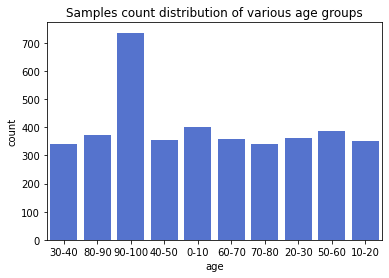

In [ ]:
# Checking classes distribution

sns.countplot(x=df_train['age'], color="royalblue")
plt.title("Samples count distribution of various age groups")
plt.show()

## 🧰 Data Augmentation

After taking a look at the data distribution, one could observe the dominance of samples belonging to a certain class, creating a bias for the model for the majority. This problem could be tackled with the help of a technique called data augmentation. We perform data augmentation, so the model we are training could be improved to be robust against variations in data and reduce overfitting and bias.

**Understanding Data Augmentation**<br>
It is a technique used to increase the amount of data available for training by producing slight variation of the already present data to create new ones. <br>
It helps reduce overfitting. 
<img align="right" width="450px" src="https://i.imgur.com/pS8yxmi.png" style="margin-right:10rem">

Common Transformations applied
- Random Crops
- Random Rotations
- Random Zoom
- Shear
- Width Shifting
- Height Shifting
- Random Horizontal flips



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Using keras ImageDataGenerator API to augment data while training

train_generator = ImageDataGenerator(# multiplies the data by the rescaling factor
                                     rescale=1/255,
                                     # degree range for random rotations
                                     rotation_range=2,
                                     # max range of addition random zoom 
                                     zoom_range=0.2,
                                     # shear angle in counter-clockwise direction in degrees
                                     shear_range=0.1,
                                     # shift fraction of total width
                                     width_shift_range=0.1,
                                     # shift fraction of total height
                                     height_shift_range=0.1,
                                     # randomly flip horizontally.
                                     horizontal_flip=True,
                                     fill_mode='nearest')

val_generator = ImageDataGenerator(rescale=1/255)

### Sample Visualization of Data Augmentation

Found 1 validated image filenames belonging to 1 classes.
Random Samples from dataset being Augmented


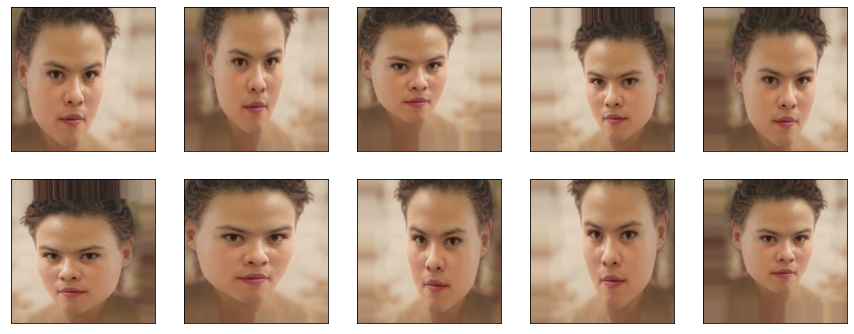

In [ ]:
# Visualizing image augmentation using a single image

sample_aug_df = df_train.iloc[0:1].copy(deep=True)
sample_aug_df.iloc[0:1, 0] = TRAIN_IMAGES_PATH + sample_aug_df.iloc[0:1, 0] + ".jpg"
sample_aug_images = train_generator.flow_from_dataframe(dataframe=sample_aug_df, x_col='ImageID', y_col='age')


# number of samples
SAMPLES = 10
COLS = 5
ROWS = (SAMPLES//COLS)+1
fig = plt.figure(figsize=(15, 3*ROWS))
for idx in range(SAMPLES):
    ax = fig.add_subplot(ROWS, COLS, idx+1)
    ax.set_xticks([])
    ax.set_yticks([])
    
    sample_aug_batch = next(sample_aug_images)
    ax.imshow(sample_aug_batch[0][0])

print("Random Samples from dataset being Augmented")
plt.show()

###   

## ⚙️ Data Pre-processing

The current state of the datasets is not much useful to proceed further, so we will be applying some processing functions on the dataframes to proceed further for train-validation data generation. The pre-processing function applied on the dataframe, appends the complete path to the names of the images to be fed into the image generator.

In [ ]:
# changing image name to filename
df_train.ImageID = df_train.ImageID.apply(lambda image_name:TRAIN_IMAGES_PATH + image_name + ".jpg")
df_val.ImageID = df_val.ImageID.apply(lambda image_name:VAL_IMAGES_PATH + image_name + ".jpg")

print("Training Dataframe")
print(df_train.head(3), "\n")
print("Validation Dataframe")
print(df_val.head(3))

Training Dataframe
                ImageID     age
0  data/train/93vu1.jpg   30-40
1  data/train/yjifi.jpg   80-90
2  data/train/ldd2k.jpg  90-100 

Validation Dataframe
              ImageID    age
0  data/val/444vl.jpg  40-50
1  data/val/4eg4u.jpg  80-90
2  data/val/8pk8y.jpg  40-50


### Train - Validation Data Generators

`Data Generator` generates batches of data with real-time data augmentation. A data generator is often used since loading the entire dataset into memory is not feasible and not an option since we run out of system memory easily. A data generator on the other hand loads only a single batch of data that is currently required and could be modified as per custom requirements.

Two generators, train, and validation are created as we do not need some additional functionality present in a training generator like data augmentation and shuffling.

In [ ]:
# number of images per batch
BATCH_SIZE = 64
# dimensions to which images to be resized
TARGET_SIZE = (224, 224)

# creating the training images generator
train_images = train_generator.flow_from_dataframe(# dataframe containing the filepaths relative to directory
                                                   dataframe=df_train,
                                                   # column in dataframe that contains the filenames
                                                   x_col='ImageID',
                                                   # column in dataframe that has the target data
                                                   y_col='age',
                                                   # dimensions to which all images to be resized
                                                   target_size=TARGET_SIZE,
                                                   # color channels images to be converted ("grayscale", "rgb", "rgba")
                                                   color_mode='rgb',
                                                   # mode for yielding the targets("binary", "categorical", "input", "multi_output", "raw", sparse")
                                                   class_mode='categorical',
                                                   # size of the batches of data
                                                   batch_size=BATCH_SIZE,
                                                   # option to whether to shuffle the data, (False for validation)
                                                   shuffle=True,
                                                   # optional random seed for replicating the shuffling 
                                                   seed=42)


# creating the validation images generator
val_images = val_generator.flow_from_dataframe(dataframe=df_val,
                                               x_col='ImageID',
                                               y_col='age',
                                               target_size=TARGET_SIZE,
                                               color_mode='rgb',
                                               class_mode='categorical',
                                               batch_size=BATCH_SIZE,
                                               shuffle=False)

Found 4000 validated image filenames belonging to 10 classes.
Found 2000 validated image filenames belonging to 10 classes.


###   

## 🛠️ Model Building

Before we start building our age prediction model, we will briefly touch upon how convolutional neural networks work and then move on to build it by training a known CNN model called Alexnet.

### Understanding basics of Convolutional Neural Networks

 - [MIT Video Lecture](https://www.youtube.com/watch?v=iaSUYvmCekI)
 - [Detailed Written Explanation](https://poloclub.github.io/cnn-explainer/)
 - [Wikipedia](https://en.wikipedia.org/wiki/Convolutional_neural_network)

#### CNN Architecture
A convolutional neural networks or CNN are a type of artificial neural network that is capable of learning and recognizing patterns in image data. CNNs are composed of multiple convolutional and pooling layers that extract features from low-level features and as we move on to deeper layers, they combine the earlier layers to form high-level features and are finally followed by one or more fully connected layers at the end.

<!-- <img width=600px src="media/cv/cnn.png" style="margin-left:5rem"> -->
<img width=500px src="https://i.imgur.com/ktPkAcr.png">

#### Convolutional Layers
The convolutional layers contain the weights i.e. kernels that learn to extract features that are useful for performing the task to construct the feature maps by performing convolution on the image using the kernel.

<img width=400px src="https://i.imgur.com/XpLhMvE.gif">

#### Pooling Layers
After each convolution, subsampling of the extracted features is performed using pooling layers. There are many types of pooling types like max-pooling, min-pooling. Their goal is to slowly reduce the spacial information and aggregates information as we move deeper into the network.

<img width=250px src="https://i.imgur.com/DF71yUa.gif">

### Building CNN using Alex Net Architecture
AlexNet is the name of a convolutional neural network architecture, designed by Alex Krizhevsky, that won the ImageNet Large Scale Visual Recognition Challenge back in 2012.

<img width=400px src="https://i.imgur.com/kDGZRzn.png">

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Flatten, Dropout


model = Sequential()
model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
batch_normalization_5 (Batch (None, 54, 54, 96)        384       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 256)       1024      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 384)      

### Compiling model

- [**Adam Optimizer**](https://keras.io/api/optimizers/adam/) : Adam optimization is a stochastic gradient descent method that is based on the adaptive estimation of first-order and second-order moments. Adam optimizer combines the advantage of Gradient Descent with Momentum and RMSProp Algorithm to come up with better optimizations and is well suited for problems that involve huge data and parameters.

- [**CategoricalCrossentropy Loss Function**](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class) : Computes the crossentropy loss between the labels and predictions. We use crossentropy loss functions for multi-class classification tasks and CategoricalCrossentropy when are labels are [one-hot encoded](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features).

In [ ]:
from tensorflow.keras.optimizers import Adam

# creating an adam optimizer object
optimizer = Adam()
# compiling model
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

### Setting callbacks

A [`callback`](https://keras.io/api/callbacks/) is an object that can perform actions at various stages of training like at the start or end of an epoch, before or after a single batch. They are quite handy to modify the training parameters dynamically without manual intervention using some predetermined factors.

- **[ReduceLROnPlateau](https://keras.io/api/callbacks/reduce_lr_on_plateau/)** : Reduces learning rate when the specified metric has stopped improving.
- **[ModelCheckpoint](https://keras.io/api/callbacks/model_checkpoint/)**   : Saves the best model according to the metric specified 
- **[EarlyStopping](https://keras.io/api/callbacks/early_stopping/)**     : Stopping training early incase of overfitting

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint


# learning rate reduction callback
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2,mode='max', min_lr=0.00001,verbose=1)
# early stopping callback
early_stop = EarlyStopping(monitor="val_loss", patience=2, verbose=1)
# model checkpoint saving callback
model_chkpt = ModelCheckpoint('cnn_model.hdf5',save_best_only=True, monitor='val_loss',verbose=1)

# adding created callbacks to callbacks list
callback_list = [model_chkpt,lr_reduce]

## 🚀 Model Training

In [ ]:
EPOCHS = 80

model.fit(train_images,
          epochs=EPOCHS, 
          validation_data = val_images,
          callbacks=callback_list)


Epoch 1/80
63/63 [==============================] - 64s 1s/step - loss: 1.6139 - accuracy: 0.3345 - val_loss: 1.5792 - val_accuracy: 0.3385

Epoch 00001: val_loss improved from 1.59364 to 1.57923, saving model to cnn_model.hdf5
Epoch 2/80
63/63 [==============================] - 65s 1s/step - loss: 1.5947 - accuracy: 0.3420 - val_loss: 1.5811 - val_accuracy: 0.3385

Epoch 00002: val_loss did not improve from 1.57923
Epoch 3/80
63/63 [==============================] - 66s 1s/step - loss: 1.5607 - accuracy: 0.3445 - val_loss: 1.5377 - val_accuracy: 0.3510

Epoch 00003: val_loss improved from 1.57923 to 1.53774, saving model to cnn_model.hdf5
Epoch 4/80
63/63 [==============================] - 67s 1s/step - loss: 1.5576 - accuracy: 0.3568 - val_loss: 1.7656 - val_accuracy: 0.2880

Epoch 00004: val_loss did not improve from 1.53774
Epoch 5/80
63/63 [==============================] - 66s 1s/step - loss: 1.5271 - accuracy: 0.3692 - val_loss: 1.5219 - val_accuracy: 0.3755

Epoch 00005: val_l

###  

## 🔍 Evaluation

Finishing with the model training, it is now time to judge the model performance on the validation data using some well-established metrics.

### Metric plots during training
These plots help us understand the model performance during training.

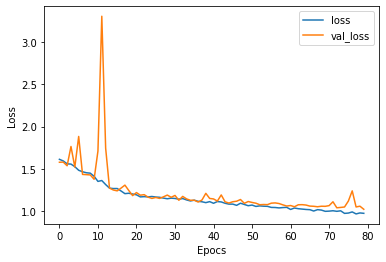

In [ ]:
# Plotting the training and validation loss against the number of epochs, 
# a decreasing trend for both training and validation indicates a good model training.

metrics = pd.DataFrame(model.history.history)
metrics[["loss","val_loss"]].plot()
plt.xlabel('Epocs')
plt.ylabel('Loss')
plt.show()

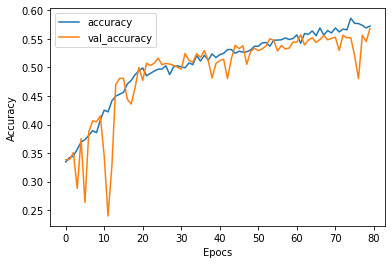

In [ ]:
# Plotting the training and validation accuracy against the number of epochs, 
# an increasing trend for both these lines also indicates a good model training.

metrics = pd.DataFrame(model.history.history)
metrics[["accuracy","val_accuracy"]].plot()
plt.xlabel('Epocs')
plt.ylabel('Accuracy')
plt.show()

### Evaluation using classification metrics

Classification metrics allow us to quantify the performance of the models. Accuracy, Precision, Recall, F1-score are some of the most popular metrics that are widely used.

<img width=500px src="https://i.imgur.com/buD99T6.png" alt="Confusion Matrix"/>

In [ ]:
# loading model
model = keras.models.load_model("cnn_model.hdf5")

# evaluating on validation data
model.evaluate(val_images)

32/32 [==============================] - 14s 282ms/step - loss: 1.0238 - accuracy: 0.5685


[1.0238008499145508, 0.5684999823570251]

In [ ]:
# Making predictions on validation data

predictions = model.predict(val_images, verbose=1)
y_val_pred = predictions.argmax(axis=1)
y_true_val = val_images.classes

32/32 [==============================] - 6s 197ms/step


In [ ]:
# Evaluating prediction on mentioned metrics

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import classification_report


# directly printing classification report
print(classification_report(y_true_val, y_val_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71       171
           1       0.56      0.48      0.51       168
           2       0.49      0.65      0.56       167
           3       0.53      0.44      0.48       194
           4       0.55      0.40      0.46       189
           5       0.40      0.40      0.40       166
           6       0.43      0.36      0.39       201
           7       0.44      0.59      0.51       202
           8       0.52      0.43      0.47       191
           9       0.83      0.90      0.86       351

    accuracy                           0.57      2000
   macro avg       0.54      0.54      0.54      2000
weighted avg       0.57      0.57      0.56      2000



#### Confusion Matrix

From the confusion matrix, it is much easier to get the picture of the overall performance of the model. It also helps us identify if the model is suffering from bias from a particular class, a high number of correct prediction in the diagnol is an indication of model generalizing better and making accurate predictions.

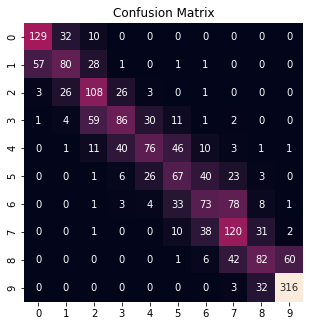

In [ ]:
# visualizing confusion matrix
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_true_val, y_val_pred)
plt.figure(figsize=(5,6))
plt.title("Confusion Matrix")
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.show()

### Visualizing predictions

In [ ]:
# reverse mapping indexes to labels
idx_label_map = {v: k for k, v in val_images.class_indices.items()}

# generating random batch from validation generator
random_batch = next(val_images)

# grabing images from batch
batch_images = random_batch[0]
# grabing true labels from batch
batch_labels = np.argmax(random_batch[1], axis=-1)

# making predictions on the batch using model
predictions_prob = model.predict(batch_images)
predictions_labels = predictions_prob.argmax(axis=-1)

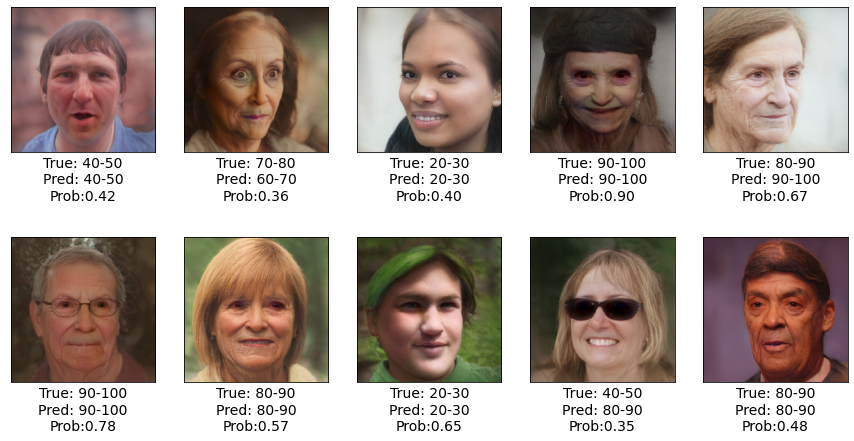

In [ ]:
# number of samples to be visualized (< batch_size)
SAMPLES = 10

COLS = 5
ROWS = (SAMPLES//COLS)+1

fig = plt.figure(figsize=(15, 4*ROWS))
for idx in range(SAMPLES):
    ax = fig.add_subplot(ROWS, COLS, idx+1)
    ax.set_xticks([])
    ax.set_yticks([])

    curr_img = batch_images[idx]
    curr_truth_label = batch_labels[idx]
    curr_pred_label = predictions_labels[idx]
    curr_pred_prob = predictions_prob[idx][curr_pred_label]

    curr_truth_label_actual = idx_label_map[curr_truth_label]
    curr_pred_label_actual = idx_label_map[curr_pred_label]

    ax.imshow(curr_img)
    ax.text(0.5, -0.2, f'True: {str(curr_truth_label_actual):s}\nPred: {str(curr_pred_label_actual):s}\nProb:{curr_pred_prob:.02f}',
            size=14, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    
plt.show()

###   

## ✅ Submission

Finally, we shall be making predictions using our model on the test data and submitting our results directly.

In [ ]:
# Reading test data folder
TEST_IMAGES_PATH = 'data/test/'

# Reading test data file
df_test = pd.read_csv("data/test.csv")

# reviewing test dataframe
print(df_test.head(3), "\n")

# Checking training and validation images count
print("Testing Images : ", len(os.listdir(TEST_IMAGES_PATH)))

# Check ingtraining and validation dataset dimensions
print("Testing        :", df_test.shape)

# reverse mapping indexes to labels
idx_label_map = {v: k for k, v in val_images.class_indices.items()}
print("\nLabels Mapping\n",idx_label_map)

  ImageID    age
0   8rti7  40-50
1   575pj  30-40
2   6ma92  30-40 

Testing Images :  3000
Testing        : (3000, 2)

Labels Mapping
 {0: '0-10', 1: '10-20', 2: '20-30', 3: '30-40', 4: '40-50', 5: '50-60', 6: '60-70', 7: '70-80', 8: '80-90', 9: '90-100'}


### ✨ Model Inference

In [ ]:
# Making predictions on test data

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

for idx in tqdm(range(len(df_test))):
    # reading test image
    image_name = str(df_test.iloc[idx, 0]) + ".jpg"
    file_name = TEST_IMAGES_PATH + image_name
    
    # loading test image
    image = load_img(file_name, target_size=TARGET_SIZE)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    
    # prediction on the image
    prediction = model.predict(image).argmax(axis=-1)[0]
    prediction_label = idx_label_map[prediction]
    df_test.iloc[idx, 1]=prediction_label

submission = df_test

  0%|          | 0/3000 [00:00<?, ?it/s]

In [ ]:
# Saving the predictions
#!rm -rf assets
!mkdir assets
submission.to_csv(os.path.join("assets", "submission.csv"))

# submission of our prediction to AIcrowd
%aicrowd notebook submit -c human-age-prediction -a assets --no-verify

###   

## 💡 More Ideas

Next steps at attempting this problem could be using `Transfer Learning` where we reuse a pre-trained model that was previously trained on a large dataset, typically on a large-scale image-classification task. By applying transfer learning to a new task, one can achieve significantly higher performance than training with only a small amount of data.

 - [Andrew Ng Video Lecture](https://www.youtube.com/watch?v=yofjFQddwHE)
 - [Tensorflow Tutorial on Transfer Learning](https://www.tensorflow.org/tutorials/images/transfer_learning)
 - [Keras Example Guide](https://keras.io/guides/transfer_learning/)
 - [Transfer Learning using TF Hub](https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub)